In [14]:
import numpy as np
from scipy.io import loadmat, wavfile
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
import speech_recognition as sr
from Signal_Analysis.features.signal import get_F_0, get_HNR
from tools import *

plt.style.use("dark_background")
mpl.rcParams["lines.linewidth"] = 0.5

## Look at an audio file

Use the ``sr.recognize_google´´ for STT

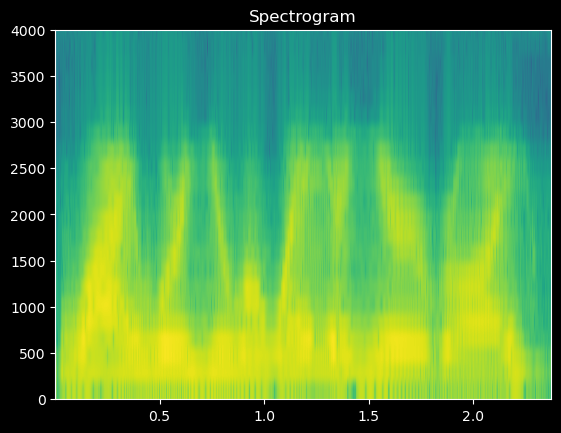

In [15]:
Fs, x = wavfile.read("wav_examples/roy.wav")

plt.figure()
spect, ff, tt, im = plt.specgram(x, Fs=Fs)
plt.ylim(0, 4000)
plt.title("Spectrogram")
plt.show()

In [16]:
r = sr.Recognizer()
with sr.AudioFile("wav_examples/roy.wav") as source:
    audio_text = r.listen(source)
try:
    text = r.recognize_google(audio_text)
except:
    pass
print(text)

VOWELS = ["e","y","u","i","o","a"]

print("# vowels", np.sum([c in VOWELS for c in text.lower()]))

why were you away a year Roy
# vowels 15


2280


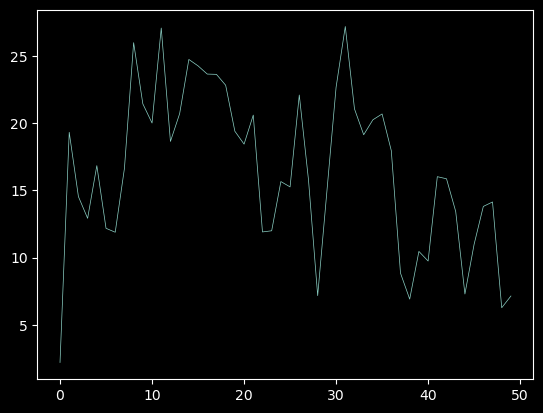

In [17]:
N = 50

step = int(np.floor(len(x) / N))
print(step)

hnr = np.empty(N)

for k in range(N):
    xk = x[k * step : (k + 1) * step]
    hnr[k] = get_HNR(xk, Fs)

plt.figure()
plt.plot(hnr)



In [18]:
#test av simpel tresholding algorithm

threshold_peak = 18
indx = np.where(hnr>threshold_peak)[0]
print(indx)

threshold_array = 3
diff = np.empty(indx.shape)
diff[0] = np.inf
diff[1:] = np.diff(indx)
mask = diff > threshold_array

indx = indx[mask]
print(indx)

start = indx[1]

vowelSound = x[start*step:(start + 1)*step*2]
sound = np.repeat(vowelSound, 1)

wavfile.write('test.wav', Fs, wavScaler(sound))



[ 1  8  9 10 11 12 13 14 15 16 17 18 19 20 21 26 30 31 32 33 34 35]
[ 1  8 26 30]


In [19]:
samplerate, american = wavfile.read("AmericanEnglish.wav")

In [20]:
with sr.AudioFile("AmericanEnglish.wav") as source:
    audio_text = r.listen(source, timeout=3)

try:
    text = r.recognize_google(audio_text)
except:
    pass
print(text)

a pencil with black lead rights best
